<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

ASSIGNMENT - SESSION 8 - Convolutional Neural Network

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>

# 8.1 Theory Review





## 8.1.1 [1 Point] End-to-end processing pipeline in Convolutional-NN

- Explain the pipeline from raw input $X$ to prediction $\hat{Y}$ in CNN. 
- Giải thích chuỗi xử lý trong mạng neuron tích chập CNN từ quan sát đầu vào $X$ đến dự báo đầu ra $\hat{Y}$:
$$X \overset{B}{\to} Z \overset{T}{\to} Z' \overset{L}{\to} \hat{Y}$$ 


Đầu vào X ta sẽ dùng k filter n layers (convolutional basis)(có thể mang các đặc trưng như là mắt mũi) tích chập với bức ảnh để so khớp để trích xuất ra k đặc trưng (feature maps) các đặc trưng này sẽ được flatten thành vector Z tiếp tục ta sẽ biến đổi đặc trưng Z thông qua một feature tranformation function ra Z' để đưa ra một không gian mới có thể dễ dàng sử dụng linear model L để đưa ra dự báo Y mũ


## 8.1.2 [1 Point] CNN module/block

- Summarize key ideas how 1 CNN module/block works to extract features. 
- Tóm tắt cơ chế hoạt động của 1 khối/mô-đun CNN để trích xuất đặc trưng.


Đầu tiên ta sẽ có khối convolution : sử dụng nhiều filter(hàm trọng số) thông qua tích chập để tìm kiếm các vị trí tương quan giữa filter gọi là feature maps sau đó ta sẽ qua Pooling layer để loại bỏ bới những thông tin không cần thiết cũng như là giảm kích thước của khung ảnh ta được kết quả là một feature maps


## 8.1.3 [1 Point] CNN vs. fully-connected layers: weight-sharing

- Explain key idea of how 1 CNN module/block works more efficiently and more effectively compared to a fully-connected layer by **weight-sharing**. 
- Giải thích điểm chính giúp CNN hiệu quả hơn so với lớp kết nối dày trong việc học trích xuất đặc trưng bằng cách chia sẻ bộ tham số.


Ta thấy được rằng các neral trên cùng một layer hoạt động độc lập với nhau khiến cho việc trích xuất đặc trưng trở nên khó khăn hơn do đó cần nhiều neral hơn, nhiều layer hơn dẫn đến số lượng trọng số phải tính tóa trở nên rất, dễ trở nên bị overfitting. Mà CNN việc chia sẻ bộ tham số giúp giảm số lượng trọng số phải tính toán nhưng vẫn đem lại kết quả tốt 

# 8.2 [3 Points] Coding Practice

Ở Assignment hôm nay, chúng ta sẽ thực hành dùng Keras để thiết kế mô hình CNN cho bài toán phân loại 10 object khác nhau

Dataset được sử dụng là CIFAR-10 (Có sẵn trên Keras)

Mục tiêu của Assignment:


*   Luyện tập coding CNN với thư viện Keras


## 8.2.1 [1 Point] Chuẩn bị dữ liệu


In [ ]:
from tensorflow.random import set_seed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Label của 10 object**

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse',
               'ship', 'truck'] 

print(type(class_names))

<class 'list'>


**Load dataset từ Keras**

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train),(X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 12s 0us/step


**Kiểm tra shape của Train Set và Test Set**

In [ ]:
# TODO
# 1. Print out the shape of X_train, y_train, X_test, y_test
print("X_train: ",X_train.shape)
print("y_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)
print(type(y_test))

X_train:  (50000, 32, 32, 3)
y_train:  (50000, 32, 32, 3)
X_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)
<class 'numpy.ndarray'>


In [ ]:
print(type(y_test))

<class 'numpy.ndarray'>


Từ shape được in ra, ta có thể thấy được dữ liệu là 1 tấm hình màu có shape là **(32,32,3)**

**Kiểm tra phân bố label giữa Train Set và Test Set**

In [ ]:
# TODO
# 1. Dùng hàm np.unique để kiểm tra
# 2. In ra kết quả
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


**Bonus: chart for classes distribution**

Text(0.5, 1.0, 'Example')

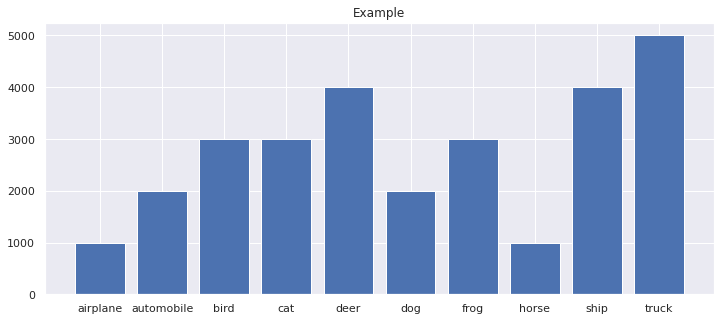

In [ ]:
plt.figure(figsize=(12,5))
# example data
data_temp = [1000,2000,3000,3000,4000,2000,3000,1000,4000,5000]
plt.bar(class_names,data_temp)
plt.title('Example')

**Tạo Validation Set**

Ở bước này, ta dùng hàm train_test_split() của sklearn để tách 10000 tấm hình ra khỏi Train Set và dùng nó làm Validation Set

Ta có thể dùng test_size=10000 để lấy ra 10000 tấm hình

**Note:** hàm train_test_split() cần thông số gì để chia đều các label ?

In [ ]:
# TODO
# 1. import train_test_split from sklearn
# 2. split X_train, y_train into new Train Set and Validation Set (1000 items)
# 3. use random_state=42
from sklearn.model_selection import train_test_split as tts
X_train,X_val,y_train,y_val = tts(X_train,y_train,shuffle = True,random_state = 42,test_size = 10000, stratify = y_train)

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_val.shape)
print("y_test: ",y_val.shape)

X_train:  (40000, 32, 32, 3)
y_train:  (40000, 1)
X_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)


**Kiểm tra phân bố label 1 lần nữa**

Lần này chúng ta sẽ vẽ đồ thị biểu diễn phân bố giữa các class trong cả 3 Set.
Học viên dùng đoạn code mẫu bên trên để tự vẽ lại.

**Gợi ý** 



*   Bản vẽ sẽ có 3 dòng 1 cột
*   Làm thế nào để lấy ra số lượng item ở mỗi class ?



In [ ]:
_,train_temp = np.unique(y_train,return_counts=True)
_,test_temp = np.unique(y_test,return_counts=True)
_,val_temp = np.unique(y_val,return_counts=True)

Text(0.5, 1.0, 'Val Distribution')

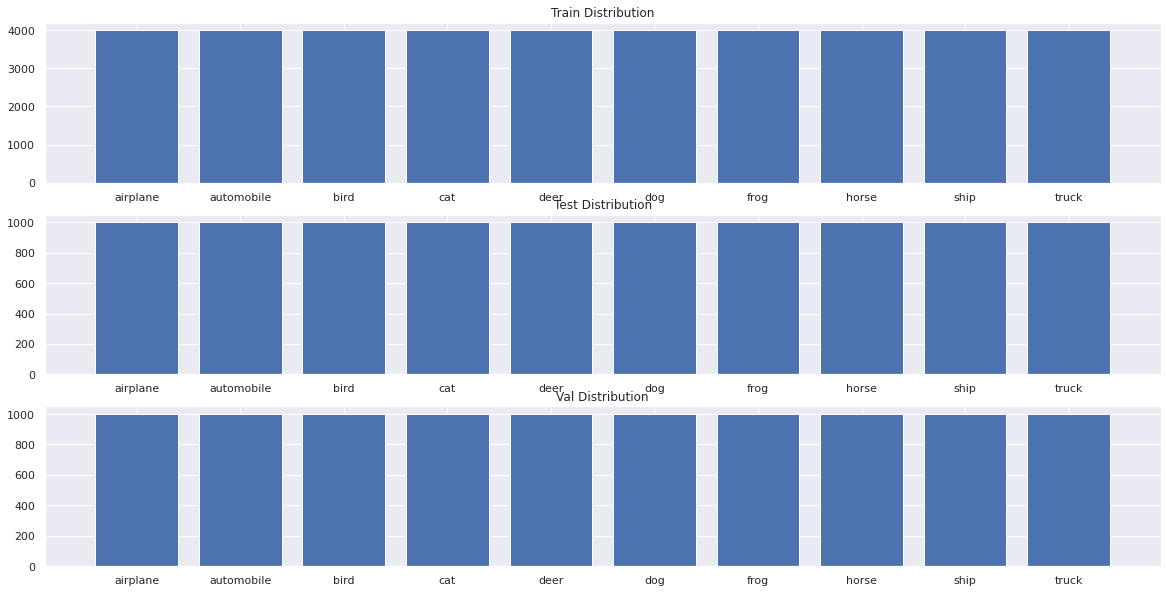

In [ ]:
# TODO
# 1. Draw 3 charts for 3 Set
# 2. hint: subplot(3,1,1)
from matplotlib import pyplot as plt
plt.figure( figsize = (20,10))
plt.subplot(3,1,1)
plt.bar(class_names,train_temp)
plt.title('Train Distribution')
plt.subplot(3,1,2)
plt.bar(class_names,test_temp)
plt.title('Test Distribution')
plt.subplot(3,1,3)
plt.bar(class_names,val_temp)
plt.title('Val Distribution')

**One hot encoding cho label y**

In [ ]:
# TODO:
# 1. import to_categorical() from keras
# 2. Apply encoding for y_train, y_val, y_test
# 3. Name the new variables Y_train, Y_val, Y_test
# 4. Print out the shape of Y_train, Y_val, Y_test
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train,num_classes = 10)
Y_test = to_categorical(y_test,num_classes = 10)
Y_val = to_categorical(y_val,num_classes = 10)
print(Y_train.shape)

(40000, 10)


**Scale data**

Ở bước này ta cần chuyển toàn bộ ảnh về dạng float và mỗi điểm ảnh sẽ có giá trị từ 0 đến 1.

Đầu tiên ta cần kiểm tra kiểu dữ liệu của X, cũng như giá trị min, max


In [ ]:
print('Type of X:', X_train.dtype)
print('Minimum value of X:', np.min(X_train))
print('Maximum value of X:', np.max(X_train))

Type of X: uint8
Minimum value of X: 0
Maximum value of X: 255


In [ ]:
# TODO
# 1. Convert 3 Set to float32 and / 255.0
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

## 8.2.2 Visualize data

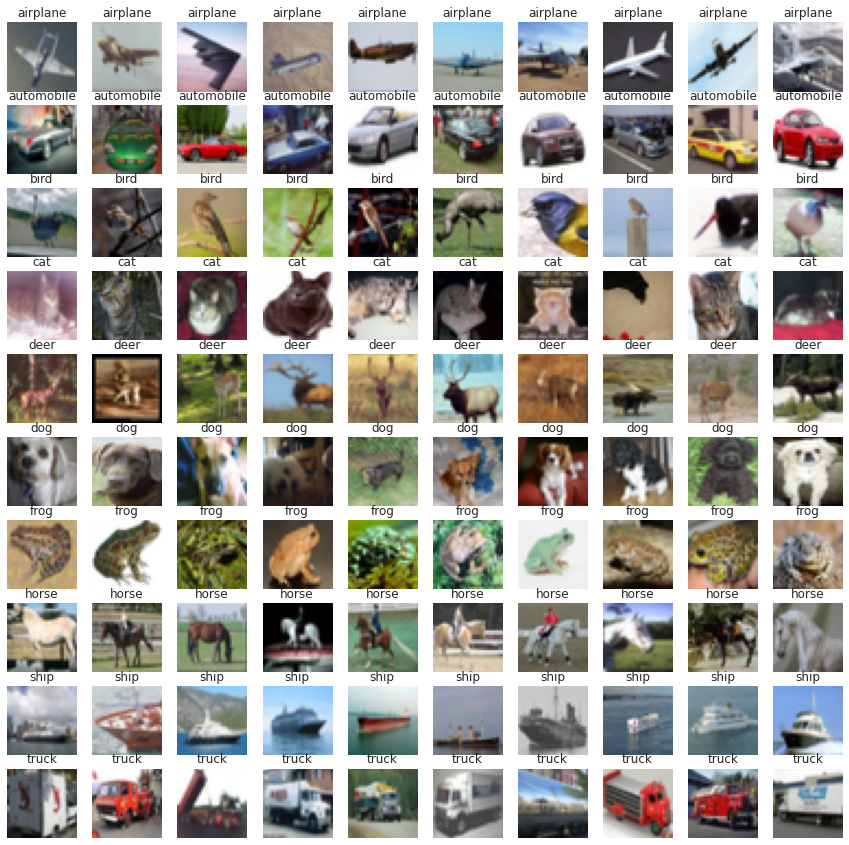

In [ ]:
# TODO
# 1. Write code to show 10 images for each class (Total: 100 images)
fig, axs = plt.subplots(10,10)
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(10):
  for j in range(10):
    target = np.random.choice(np.where(y_train == i)[0])
    axs[i][j].grid('off')
    axs[i][j].axis('off')
    axs[i][j].imshow(X_train[target])
    axs[i][j].set_title(class_names[i])
    

**Xây dựng hàm draw_chart() để vẽ Learning Curve**

In [ ]:
# TODO
# 1. complete the draw_chart() function below

def draw_chart(history):
    plt.figure(figsize = (20,10))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss vs Epochs')
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Loss vs Epochs')

## 7.2.3 [1 Point] Thiết kế mô hình CNN

**Xây dựng kiến trúc cho model**

Ở đây vì lượng layers cần import là rất nhiều, ta dùng import * để import tất cả layer có trong keras.layers

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

Ở phần này, học viên có thể tạo mô hình bằng Sequential API hoặc Model API, nếu muốn tập cách xây dựng mô hình bằng Model API có thể tham khảo đoạn code mẫu bên dưới
```
def build_cnn_block(layer, filters, k_size, use_pooling=True):
  layer = Conv2D(filters, k_size, padding='same')(layer)
  layer = BatchNormalize()(layer)
  layer = Activation('relu')(layer)
  if use_pooling == True:
    layer = MaxPooling2D()(layer)
  return layer

def build_mlp_block(layer, units):
  for unit in units:
    layer = Dense(unit)(layer)
    layer = Dropout(0.5)(layer)
    layer = Activation('relu')(layer)
  return layer

def build_cnn_model(input_shape):
  # input layer
  input = Input(shape=input_shape)
  # cnn block
  cov_block_1 = build_cnn_block(input, 16, 3)
  cov_block_2 = build_cnn_block(cov_block_1, 32, 3)
  # flatten layer
  flatten = Flatten()(cov_block_2)
  # mlp block
  mlp = build_mlp_block(flatten, [512, 256])
  # output layer
  out = Dense(10, activation='softmax')(mlp)
  # build moodel and compile
  model = Model(input, out)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
```

Học viên được tự do thiết kế kiến trúc cho model của mình (đừng copy lại code mẫu ở trên) (có thể áp dụng Dropout, BatchNormlization, EarlyStopping, ReduceLROnPlataue v.v..) 

Do đây là bài toán cần đến mô hình Deep CNN để giải quyết nên kết quả của mô hình CNN basic có thể sẽ không được cao. Nhưng hãy cố đạt Accuracy cao nhất có thể trên Test Set

In [ ]:
# TODO
# 1. Create an End-to-End CNN model to solve Cifar-10 problem

def create_cnn_block(layer,filters,k_size,use_maxpool = True):
    layer = Conv2D(filters,
                   k_size,
                   padding='same',
                   activation = 'relu',)(layer)
    layer = BatchNormalization()(layer)
    if use_maxpool == True :
        layer = MaxPool2D()(layer)
    return layer
def create_mlp_block(layer,units):
    for unit in units :
        layer = Dense(unit)(layer)
        # layer = BatchNormalization()(layer)
        # layer = Dropout(p = 0.5)(layer)
        layer = Activation('relu')(layer)
    return layer
# Input
input = Input(shape = X_train.shape[1:])
# CNN Block
conv_1 = create_cnn_block(input,32,3,use_maxpool=False)
conv_2 = create_cnn_block(conv_1,32,3)
conv_3 = create_cnn_block(conv_2,64,3,use_maxpool=False)
conv_4 = create_cnn_block(conv_3,64,3)
conv_5 = create_cnn_block(conv_4,128,3,use_maxpool=False)
conv_6 = create_cnn_block(conv_5,128,3)
# Flatten
flatten = Flatten()(conv_6)
#MLP Block
mlp = create_mlp_block(flatten,[216,512,512])
#Output
output = Dense(10,activation = 'softmax')(mlp)
#model
model = Model(input,output)
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)       

**Huấn luyện mô hình**

In [ ]:
# TODO
# 1. Train your model, remember to use validation_data
from tensorflow.keras.callbacks import *

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',patience = 5,factor = 0.1)
early_stop = EarlyStopping(monitor ='val_loss',patience = 20, restore_best_weights = True)
# Train model
history = model.fit(X_train,Y_train,
                    epochs = 1000,
                    validation_data=(X_val,Y_val),
                    callbacks=[reduce_lr,early_stop],
                    verbose = 1)

Epoch 1/1000
1250/1250 [==============================] - 20s 16ms/step - loss: 1.2553 - accuracy: 0.5520 - val_loss: 1.3760 - val_accuracy: 0.5266
Epoch 2/1000
1250/1250 [==============================] - 19s 16ms/step - loss: 0.8280 - accuracy: 0.7139 - val_loss: 1.0561 - val_accuracy: 0.6613
Epoch 3/1000
1250/1250 [==============================] - 20s 16ms/step - loss: 0.6578 - accuracy: 0.7741 - val_loss: 0.7406 - val_accuracy: 0.7589
Epoch 4/1000
1250/1250 [==============================] - 20s 16ms/step - loss: 0.5473 - accuracy: 0.8115 - val_loss: 0.7552 - val_accuracy: 0.7530
Epoch 5/1000
1250/1250 [==============================] - 20s 16ms/step - loss: 0.4364 - accuracy: 0.8503 - val_loss: 0.7109 - val_accuracy: 0.7795
Epoch 6/1000
1250/1250 [==============================] - 20s 16ms/step - loss: 0.3562 - accuracy: 0.8767 - val_loss: 0.8077 - val_accuracy: 0.7508
Epoch 7/1000
1250/1250 [==============================] - 20s 16ms/step - loss: 0.2931 - accuracy: 0.9002 - val_

**Dùng hàm draw_chart bên trên để vẽ Learning Curve**

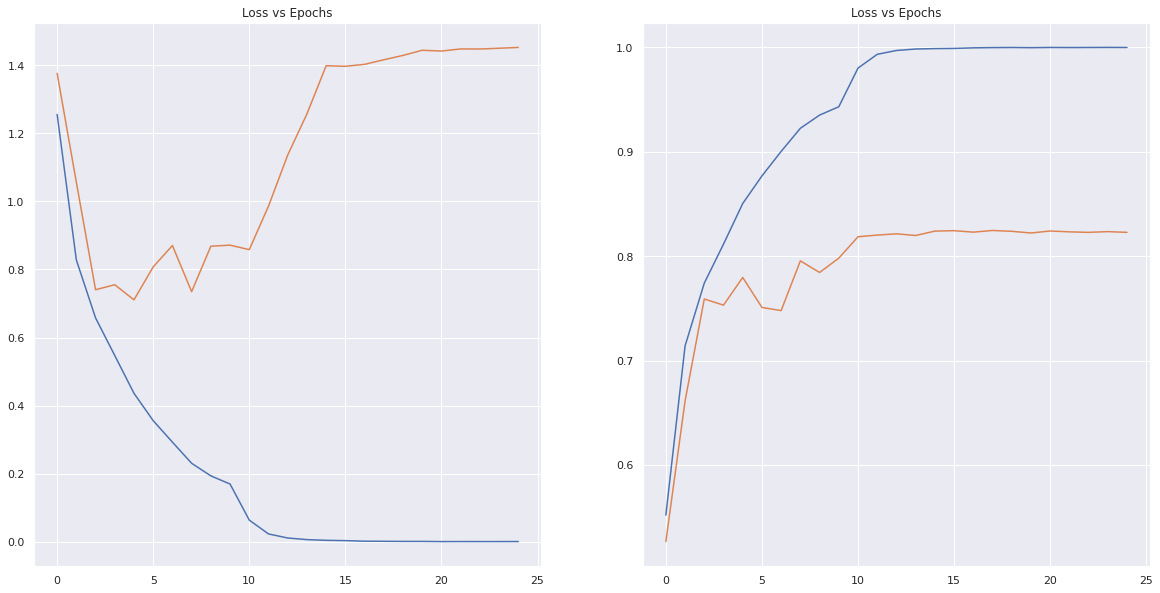

In [ ]:
# TODO
# 1. call draw_chart() function
draw_chart(history)

**Đánh giá model trên tập Train, Validation, Test**

In [ ]:
# TODO 
# 1. use model.evaluate() on 3 Set
print(model.evaluate(X_train,Y_train))
print(model.evaluate(X_val,Y_val))
print(model.evaluate(X_test,Y_test))

1250/1250 [==============================] - 7s 6ms/step - loss: 0.3603 - accuracy: 0.8792
[0.36027294397354126, 0.8792499899864197]
313/313 [==============================] - 2s 7ms/step - loss: 0.7109 - accuracy: 0.7795
[0.7108769416809082, 0.7795000076293945]
313/313 [==============================] - 2s 7ms/step - loss: 0.7244 - accuracy: 0.7744
[0.7243750095367432, 0.774399995803833]


## 7.2.4 [1 Point] Error Analysis

**Tạo Confusion Matrix và vẽ HeatMap**

Gợi ý:
- Import thư viên seaborn (dùng để vẽ heatmap)
- Import confusion_matrix từ sklearn.metrics
- Hàm confusion_matrix sẽ nhận vào y_test và y_pred
- Để có được y_pred ta dùng hàm predict() của mô hình và kết hợp với hàm np.argmax()
- Vẽ heatmap bằng câu lệnh sau
```
sns.heatmap(confusion_matrix_đã_tính, annot=True, cmap='Blues', fmt='.1f')
```

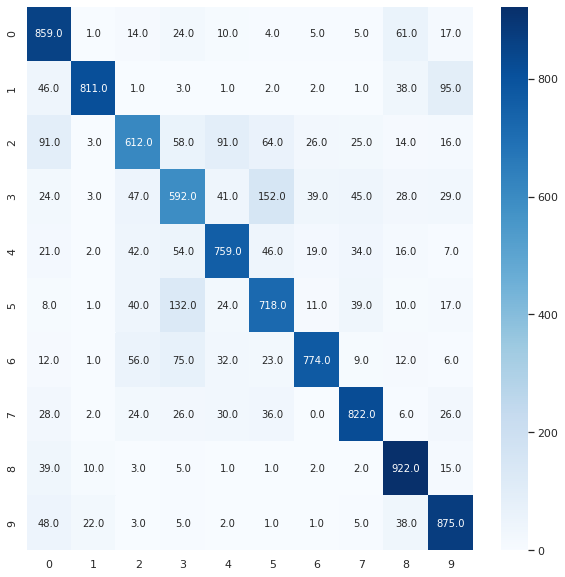

In [ ]:
# TODO
# 1. Plot confusion matrix
from sklearn.metrics import confusion_matrix 
import seaborn as sns

y_pred_conf = model.predict(X_test)
# y_pred_conf = np.where(y_pred_conf>0.5,1,0)
# print(y_pred_conf)
conf_matrix = confusion_matrix(y_test,y_pred_conf.argmax(axis = 1))
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix,annot = True, cmap ='Blues',fmt = '.1f')

**Vẽ ra các tấm hình bị dự đoán sai**

Gợi ý:
- Tìm index của các tấm hình bị dự đoán sai trong tập Test
- Chọn random 100 tấm hình bị sai ra để vẽ (Tham khảo bài giảng trên lớp)
  - Học viên có thể modify code để vẽ ra 100 tấm hình bị sai theo từng class trên mỗi dòng

(10000, 1)
(2256,)


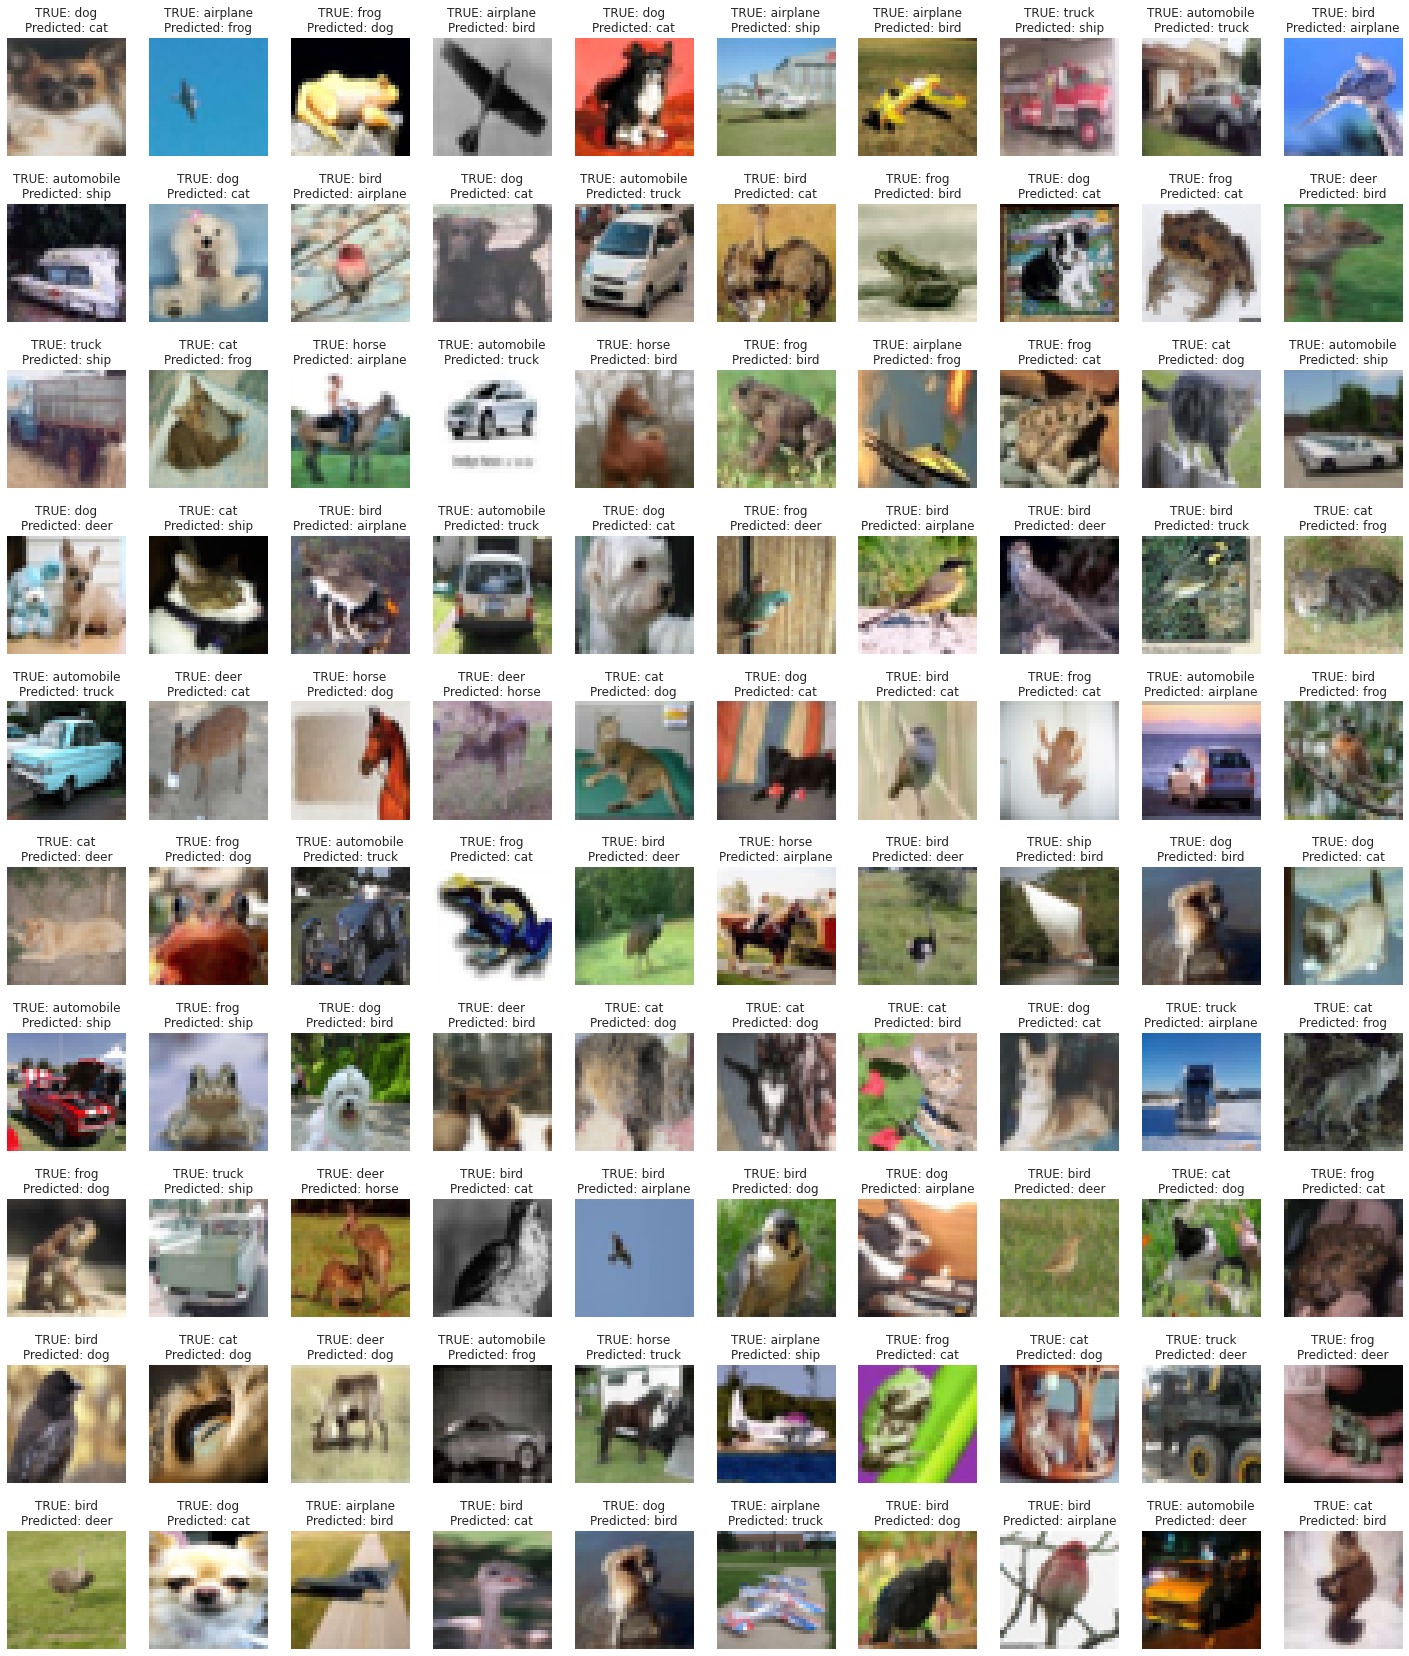

In [ ]:
# TODO
# 1. Plot 100 wrongly predicted images
y_pred = model.predict(X_test)
# print(y_pred)
y_pred = np.argmax(y_pred, axis=1)
print(y_test.shape)
wrong_predict = np.where(y_pred != Y_test.argmax(axis = 1))[0]
print(wrong_predict.shape)
fig, axs = plt.subplots(10,10)
fig.set_figheight(30)
fig.set_figwidth(25)
for i in range(10):
  for j in range(10):
    target = np.random.choice(wrong_predict)
    axs[i][j].grid('off')
    axs[i][j].axis('off')
    axs[i][j].imshow(np.squeeze(X_test[target]), cmap='gray')
    name = 'TRUE: {}\nPredicted: {}'.format(class_names[Y_test.argmax(axis = 1)[target]], class_names[y_pred[target]])
    axs[i][j].set_title(name)
